## Import Libraries



In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

load file

In [4]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
print(df["region"].unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [10]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


from above describe there are 75% charges is 16639 rs. and maximum charges is 63770 rs,from that  we can say that there are outliers in charges feature


## EDA Analysis

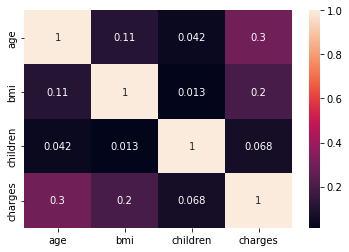

In [13]:
sns.heatmap(df.corr(),annot=True)

there is no no such correlation between any features


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


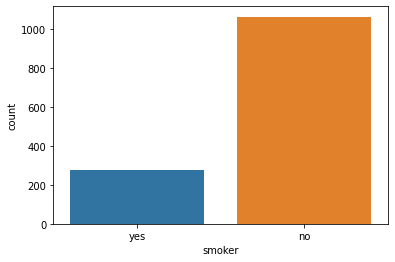

In [14]:
sns.countplot(df['smoker'],label="Count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


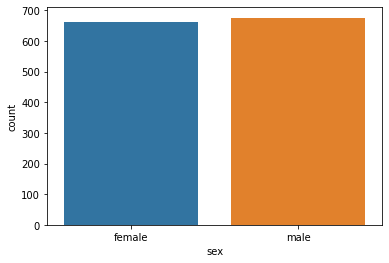

In [15]:
sns.countplot(df['sex'],label="Count")

In [16]:
# Get the max bmi
print(df['bmi'].max()) 

53.13


In [17]:

# Group the bmi in bins
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 60, 12)]

df['bmi_group'] = pd.cut(df.bmi, range(1, 72, 12), right=False, labels=labels)

#Use cut when you need to segment and sort data values into bins. 

In [18]:
df['bmi_group'].value_counts()

25 - 36    889
13 - 24    245
37 - 48    200
49 - 60      4
1 - 12       0
Name: bmi_group, dtype: int64

In [19]:
# Get the max bmi
print(df['age'].max()) 

64


In [20]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 60, 12)]

df['age_group'] = pd.cut(df.age, range(1, 72, 12), right=False, labels=labels)

In [21]:
df['age_group'].value_counts()

37 - 48    326
49 - 60    322
25 - 36    321
13 - 24    278
1 - 12       0
Name: age_group, dtype: int64

In [22]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 14999) for i in range(1, 72000, 15000)]

df['charges_group'] = pd.cut(df.charges, range(1, 80000, 15000), right=False, labels=labels)

In [23]:
df['charges_group'].value_counts()

1 - 15000        980
15001 - 30000    196
30001 - 45000    124
45001 - 60000     35
60001 - 75000      3
Name: charges_group, dtype: int64

## Univariate Analysis

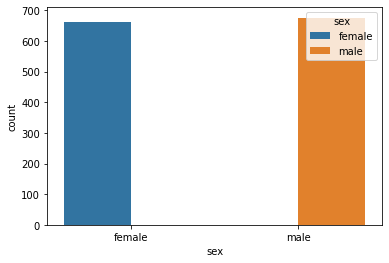

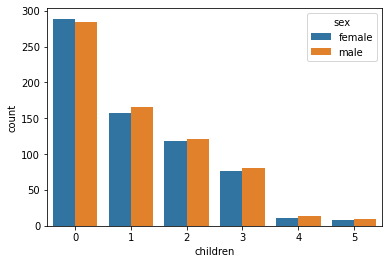

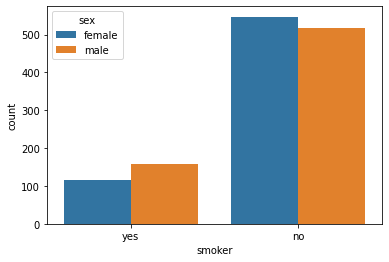

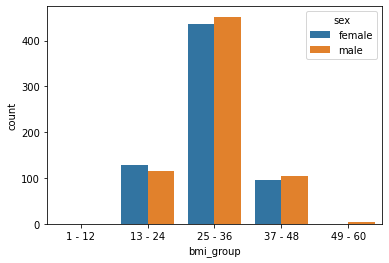

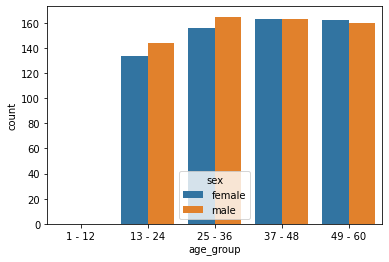

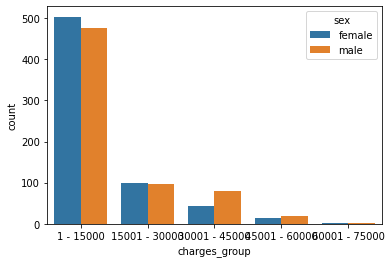

In [24]:
for i, predictor in enumerate(df.drop(columns=['region','charges','age','bmi'])):
    plt.figure()
    sns.countplot(data=df, x=predictor, hue='sex')

    #enumerate - dealing with iterators, we also get a need to keep a count of iterations.

From that we can say that,


1.   those have no children this male and female are more.
2.   in this data there are less smokers than no- smokers.
3. those peoples have BMI in between 25-36 this peoples are more.
4.  more peoples in between 25-60 age of group.
5.  more charges by female in between 1200-150000 



In [25]:
#df['smoker'] = np.where(df.smoker == 'yes',1,0)

## Bivariate Analysis

In [26]:
new_df1_target0=df.loc[df["smoker"]=='no']
new_df1_target1=df.loc[df["smoker"]=='yes']

In [27]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
 
    
    
    #temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    #width = len(df[col].unique())
    fig.set_size_inches(8 , 8)
   # plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col,hue = hue,palette='bright') 
        # order=df[col].value_counts().index -- use for ascending order
    plt.show()

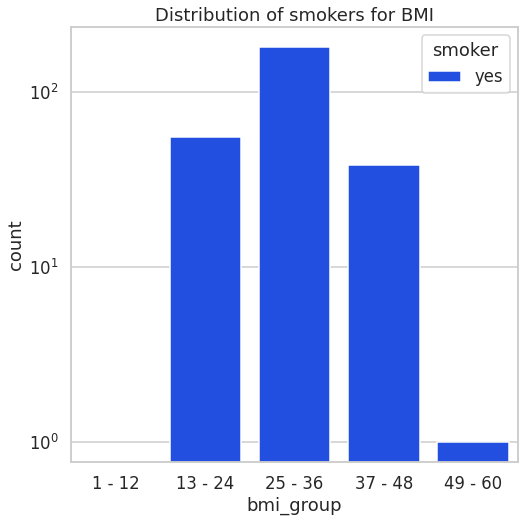

In [28]:
uniplot(new_df1_target1,col='bmi_group',title='Distribution of smokers for BMI',hue='smoker')

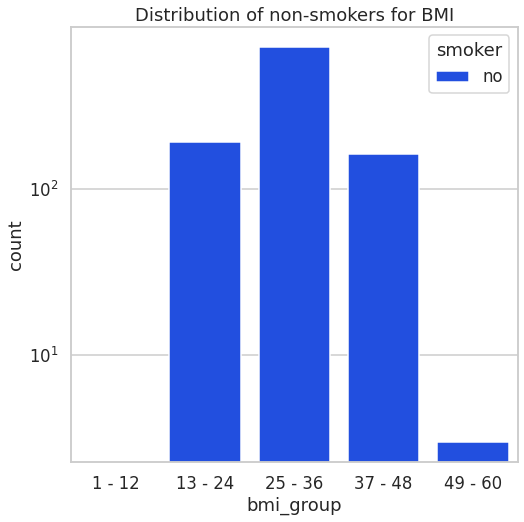

In [29]:
uniplot(new_df1_target0,col='bmi_group',title='Distribution of non-smokers for BMI',hue='smoker')

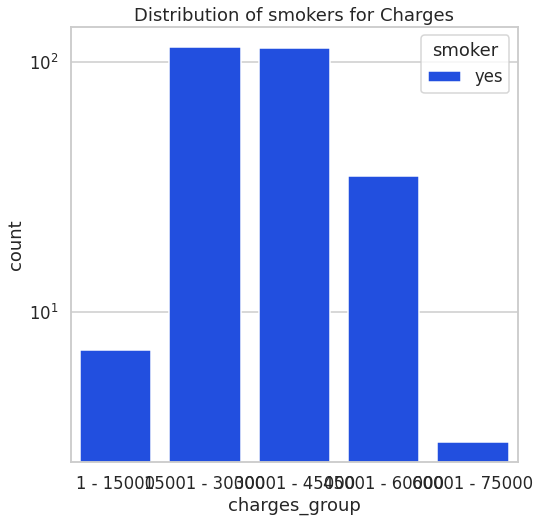

In [30]:
uniplot(new_df1_target1,col='charges_group',title='Distribution of smokers for Charges',hue='smoker')

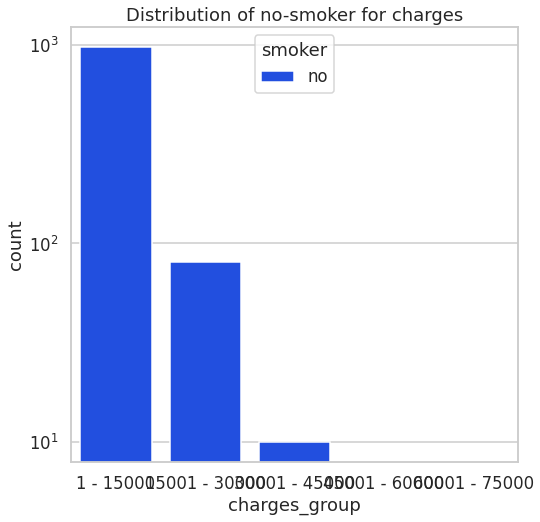

In [31]:
uniplot(new_df1_target0,col='charges_group',title='Distribution of no-smoker for charges',hue='smoker')

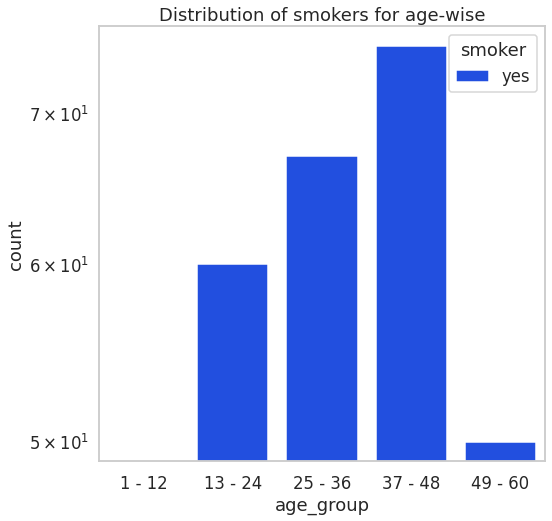

In [32]:
uniplot(new_df1_target1,col='age_group',title='Distribution of smokers for age-wise',hue='smoker')

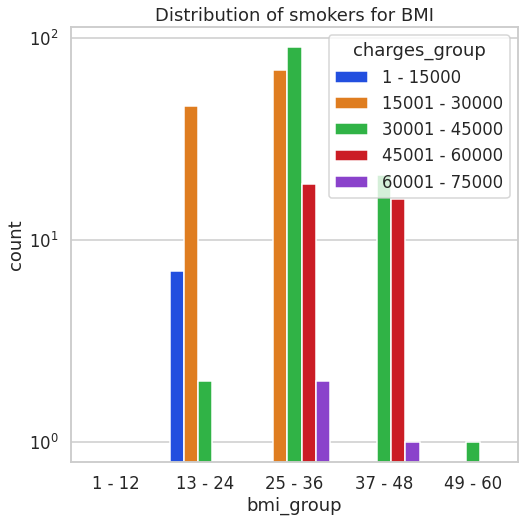

In [33]:
uniplot(new_df1_target1,col='bmi_group',title='Distribution of smokers for BMI',hue='charges_group')

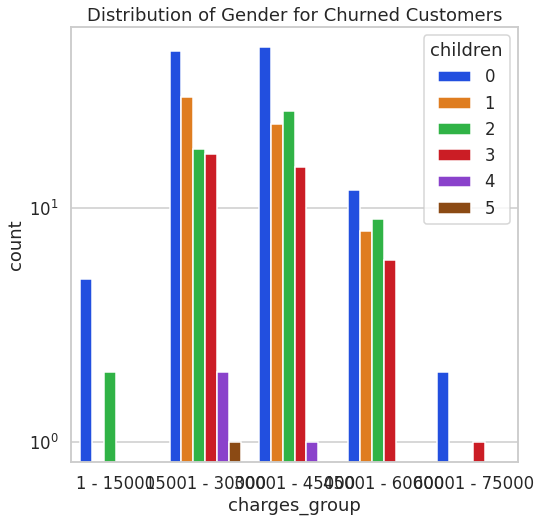

In [34]:
uniplot(new_df1_target1,col='charges_group',title='Distribution of Gender for Churned Customers',hue='children')

From above we can conclude that,

1. those are smokers and non- smokers there have approximetly BMI values.
2. those people are smokers they paying more charges than non-smokers.
3. age between 37-48 this peoples are more smokers.
4. Higher BMI persons has to pay more than lower ones.
5. Having high number of childern means can only spend less  on insurance. 

**PLot the boxplot**

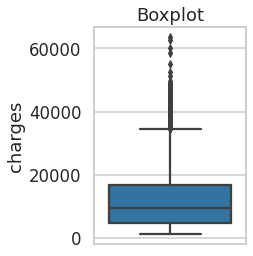

In [35]:
 plt.subplot(1, 2, 2)
sns.boxplot(y=df['charges'])
plt.title('Boxplot')
 plt.show()

**PLot the histogram**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram')

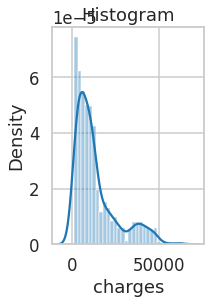

In [36]:
  # histogram
plt.subplot(1, 2, 2)
sns.distplot(df['charges'], bins=30)
plt.title('Histogram')

## Remove_outliers

In [ ]:
 '''df_out = pd.DataFrame()
 m = np.mean(df.charges)
std = np.std(df.charges)
 reduced_df = df[(df.charges>(m-st)) & (df.charges<=(m+st))] #lower limit & upper limit
df_out = pd.concat([df_out,reduced_df],ignore_index=True)
 print(m)
 print(std)'''

'df_out = pd.DataFrame()\nm = np.mean(df.charges)\nstd = np.std(df.charges)\nreduced_df = df[(df.charges>(m-st)) & (df.charges<=(m+st))] #lower limit & upper limit\ndf_out = pd.concat([df_out,reduced_df],ignore_index=True)\nprint(m)\nprint(std)'

NameError: ignored

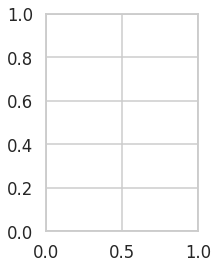

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df_out['charges'])
plt.title('Boxplot')
plt.show()

In [ ]:
  # histogram
plt.subplot(1, 2, 2)
sns.distplot(df_out['charges'], bins=30)
plt.title('Histogram')

In [ ]:
df_out.shape

In [ ]:
df_out.head()

## Drop columns

In [37]:
df_drop = df.drop(['bmi_group','age_group', 'charges_group','region'],axis='columns')
df_drop.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


Convert string to numeric values

In [38]:
df_dummies = pd.get_dummies(df_drop)
df_dummies.head(3)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.90,0,16884.9240,1,0,0,1
1,18,33.77,1,1725.5523,0,1,1,0
2,28,33.00,3,4449.4620,0,1,1,0



## Model Building

In [66]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
import sklearn.metrics as metrics 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [40]:
X = df_dummies.drop(['charges'],axis='columns')
y = df_dummies.charges

In [41]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,1,0,0,1
1,18,33.770,1,0,1,1,0
2,28,33.000,3,0,1,1,0
3,33,22.705,0,0,1,1,0
4,32,28.880,0,0,1,1,0


In [42]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [43]:
print(X.shape)
print(y.shape)

(1338, 7)
(1338,)



## Train Test Split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state = 0)

In [45]:
print(X_train.shape)
print(y_train.shape)

(936, 7)
(936,)


In [46]:
print(X_test.shape)
print(y_test.shape)

(402, 7)
(402,)



## Feature Scalling

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)


## Linear Regression

In [48]:
Regressor = LinearRegression()
# Train the model using the training sets
Regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# predictin on the test set
y_pred = Regressor.predict(X_test)

In [50]:
# Calculate Model 
print("r2_score:", r2_score(y_test, y_pred))

r2_score: 0.7894790349867009


In [51]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 4008.34938274211
MSE: 33571665.685027145
RMSE: 5794.106116134493


## Random Forest Regressor

In [54]:
Regressor2 = RandomForestRegressor(n_estimators=100)
# Train the model using the training sets
Regressor2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
# predictin on the test set
y_pred2 = Regressor2.predict(X_test)

In [56]:
# Calculate Model 
print("r2_score:", r2_score(y_test, y_pred2))

r2_score: 0.8571115760951832


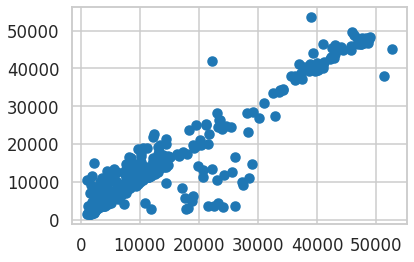

In [57]:
plt.scatter(y_test,y_pred2)

In [58]:
predictions=Regressor2.predict(X_test)

In [59]:
predictions

array([10668.4791132 ,  9834.775597  , 44729.9777025 , 13102.6290985 ,
        9475.6131906 , 12930.5004967 ,  1780.692067  , 11294.6468367 ,
        7303.5177598 ,  5393.9613605 ,  7538.2769889 , 19005.2960254 ,
        8727.6359879 ,  7739.982171  , 23791.6923903 , 13786.6015946 ,
       13881.7320768 ,  3497.9999805 ,  6458.1492635 , 33855.8542818 ,
       23923.915671  , 15659.9026416 , 10342.9738067 , 28204.3703979 ,
        3455.8086237 ,  5313.9688934 ,  5029.5387236 ,  8105.9923795 ,
        3730.5554775 , 10475.0113454 ,  8140.9364944 , 48362.7797699 ,
       14079.1696728 , 13175.3923044 , 16657.849039  ,  3704.3772305 ,
        8916.5228393 , 37968.9609766 , 39659.422326  ,  3350.528415  ,
       10104.0192963 ,  4356.2269686 , 20974.2234912 , 48062.1668625 ,
       37925.1570891 ,  3571.6899407 , 14108.3343077 ,  6655.690357  ,
        5172.79908   , 13274.6587246 ,  4130.4375635 ,  4823.6476487 ,
       26263.6710312 , 48829.7124013 , 11778.266161  ,  9851.1175876 ,
      

## Decision Tree Classifier

In [68]:
 Regressor3= DecisionTreeRegressor()


In [69]:
Regressor3.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [70]:
# predictin on the test set
y_pred3 =Regressor3.predict(X_test)

In [71]:
# Calculate Model 
print("r2_score:", r2_score(y_test, y_pred3))

r2_score: 0.707795504144283


## Conclusion:



I Conclude that XGBoost Regressor is give me the good accuracy than linear regression algorithm and support vector machine algorithm gives very less accuracy, so XGBoost Regressor model it will be able to predict the proper medical costs.

In [72]:
len(X.columns)

7

In [73]:
'''Xnew =df[age=28,sex=1,bmi=33,children=2,smoker=0]
prediction=Regressor2.predict(Xnew)
print(prediction)'''

def predict_price(age,bmi,children,sex,smoker):    
    loc_index = np.where(X.columns==smoker)[0]
    x = np.zeros(len(X.columns))
    x[0] = age
    x[1] = bmi
    x[2] = children
   # x[3] = smoker
    x[3] = sex
    if loc_index >= 0:
        x[loc_index] = 1

    return Regressor2.predict([x])[0] #- '0' - is for give exact not in array format

In [74]:
predict_price(28,33, 2, 1, 'yes')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  del sys.path[0]


15567.677589999976

## Save Model

In [75]:
import pickle

In [76]:
filename = 'model.sav'

In [77]:
pickle.dump(Regressor2, open(filename, 'wb'))

In [78]:
load_model = pickle.load(open(filename, 'rb'))

In [79]:
model_score= load_model.score(X_test,y_test)

In [80]:
model_score

0.8571115760951832